In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rcParams

In [2]:
systems=['mcam','cam_k30e','cam_g40d','cam_m36i','cam_t34k','cam_dN','scam1','scam4']
labels=['mCaM','K30E','G40D','M36I','T34K','$\Delta$NCaM','sCaM-1','sCaM-4']
comps=['2']
nRep=50
cols=['lightcoral','dodgerblue','cyan']

nPCs=3
path='/home/xfang2/backup/faust_backup/mlck/smMLCK/md/2_mlck_cam'

#xtalDat=np.genfromtxt(path+'/analyses/shortMD/pca/mlck/xtal_project',skip_header=1)[:,1:]

In [3]:
ncolors = 256
color_array = plt.get_cmap('turbo')(range(ncolors))
# change alpha values
color_array[:,-1] = np.linspace(1.0,0.0,ncolors)
color_array[0,-1] = 1
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)


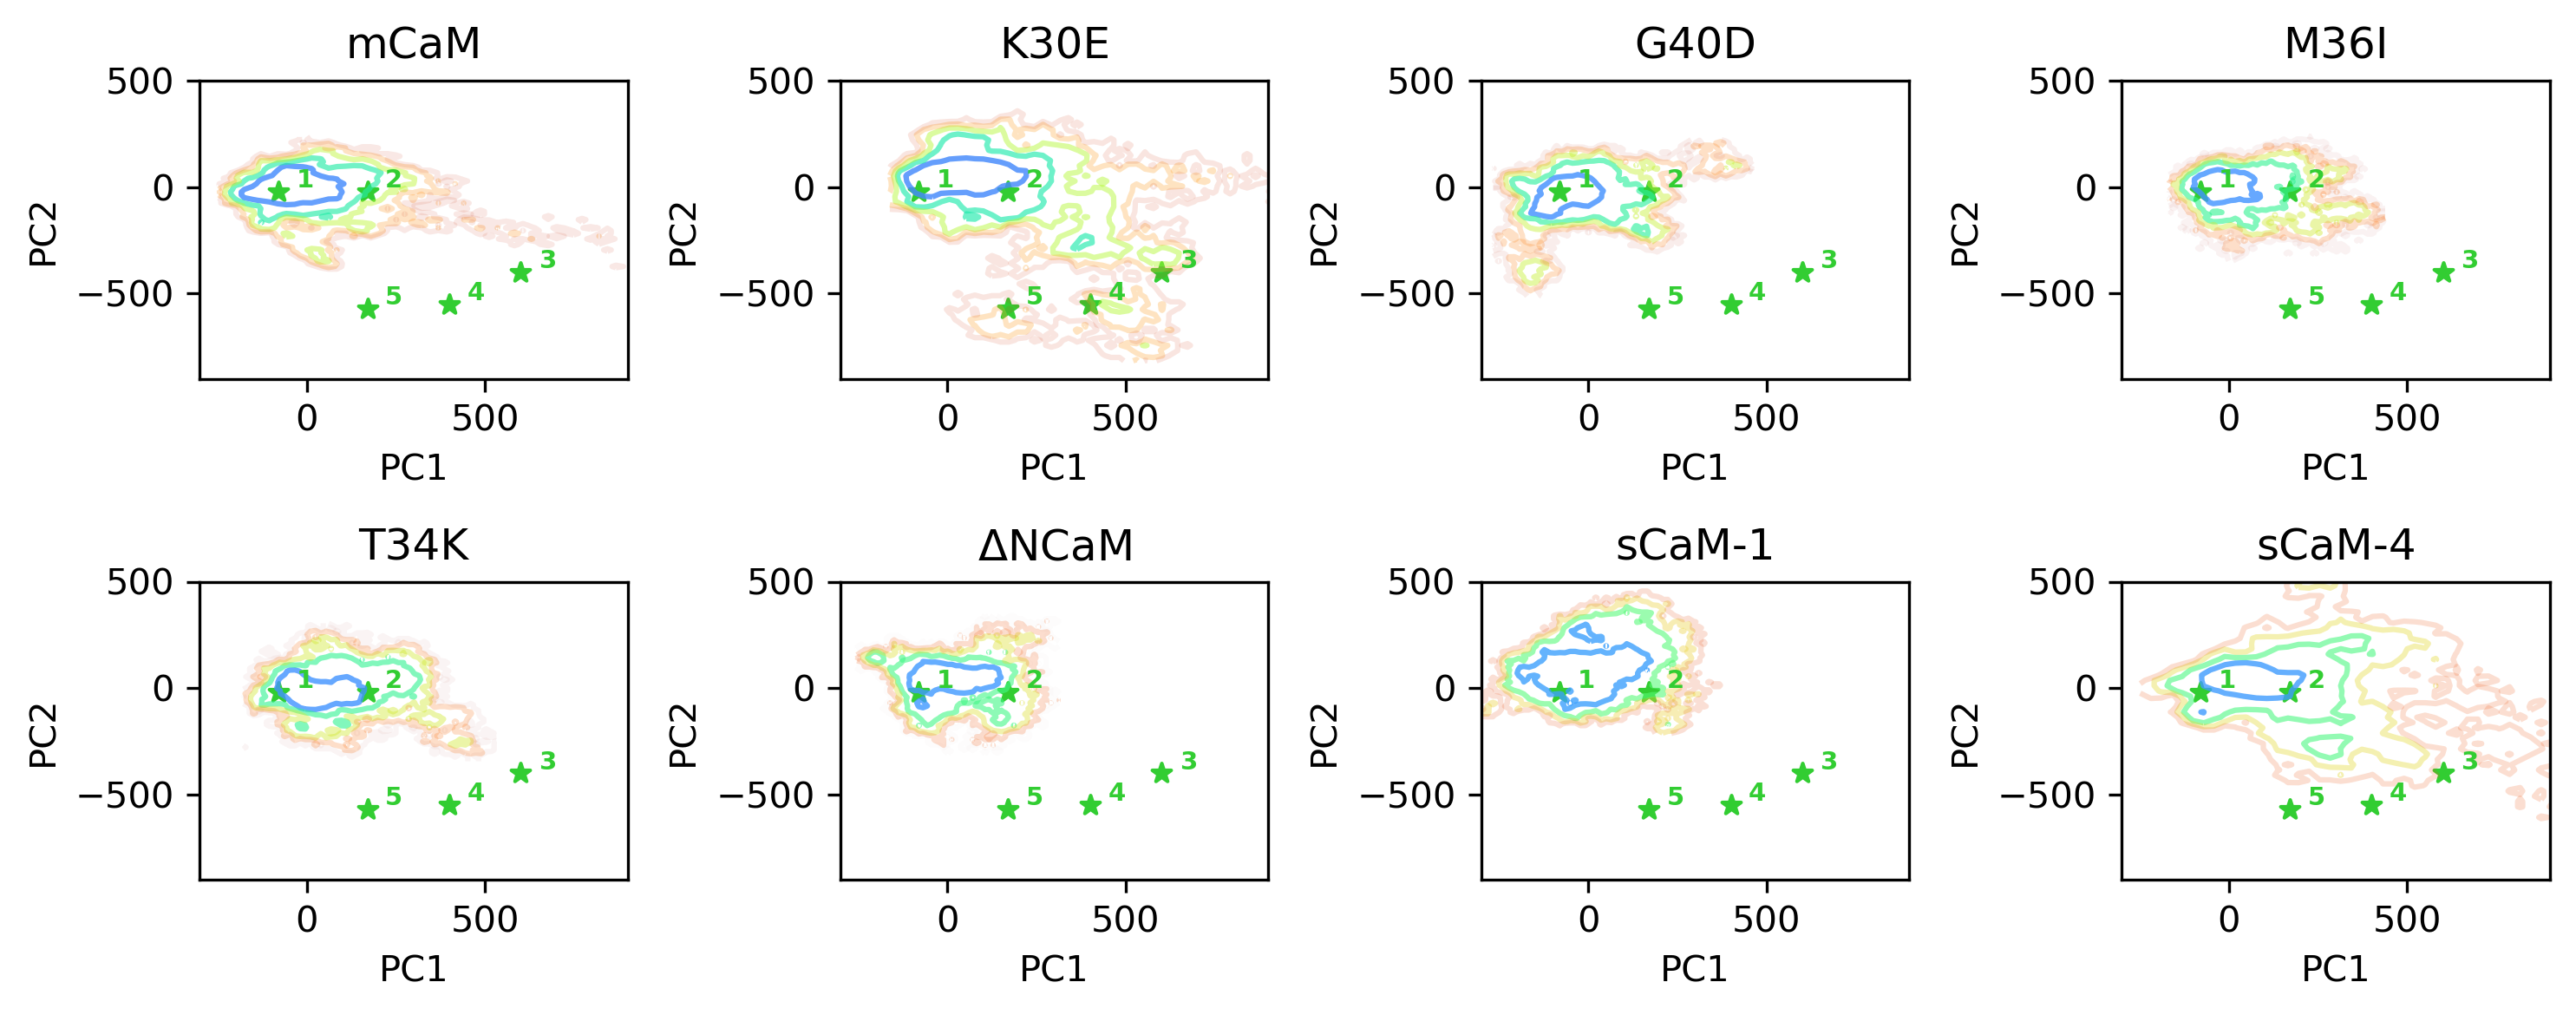

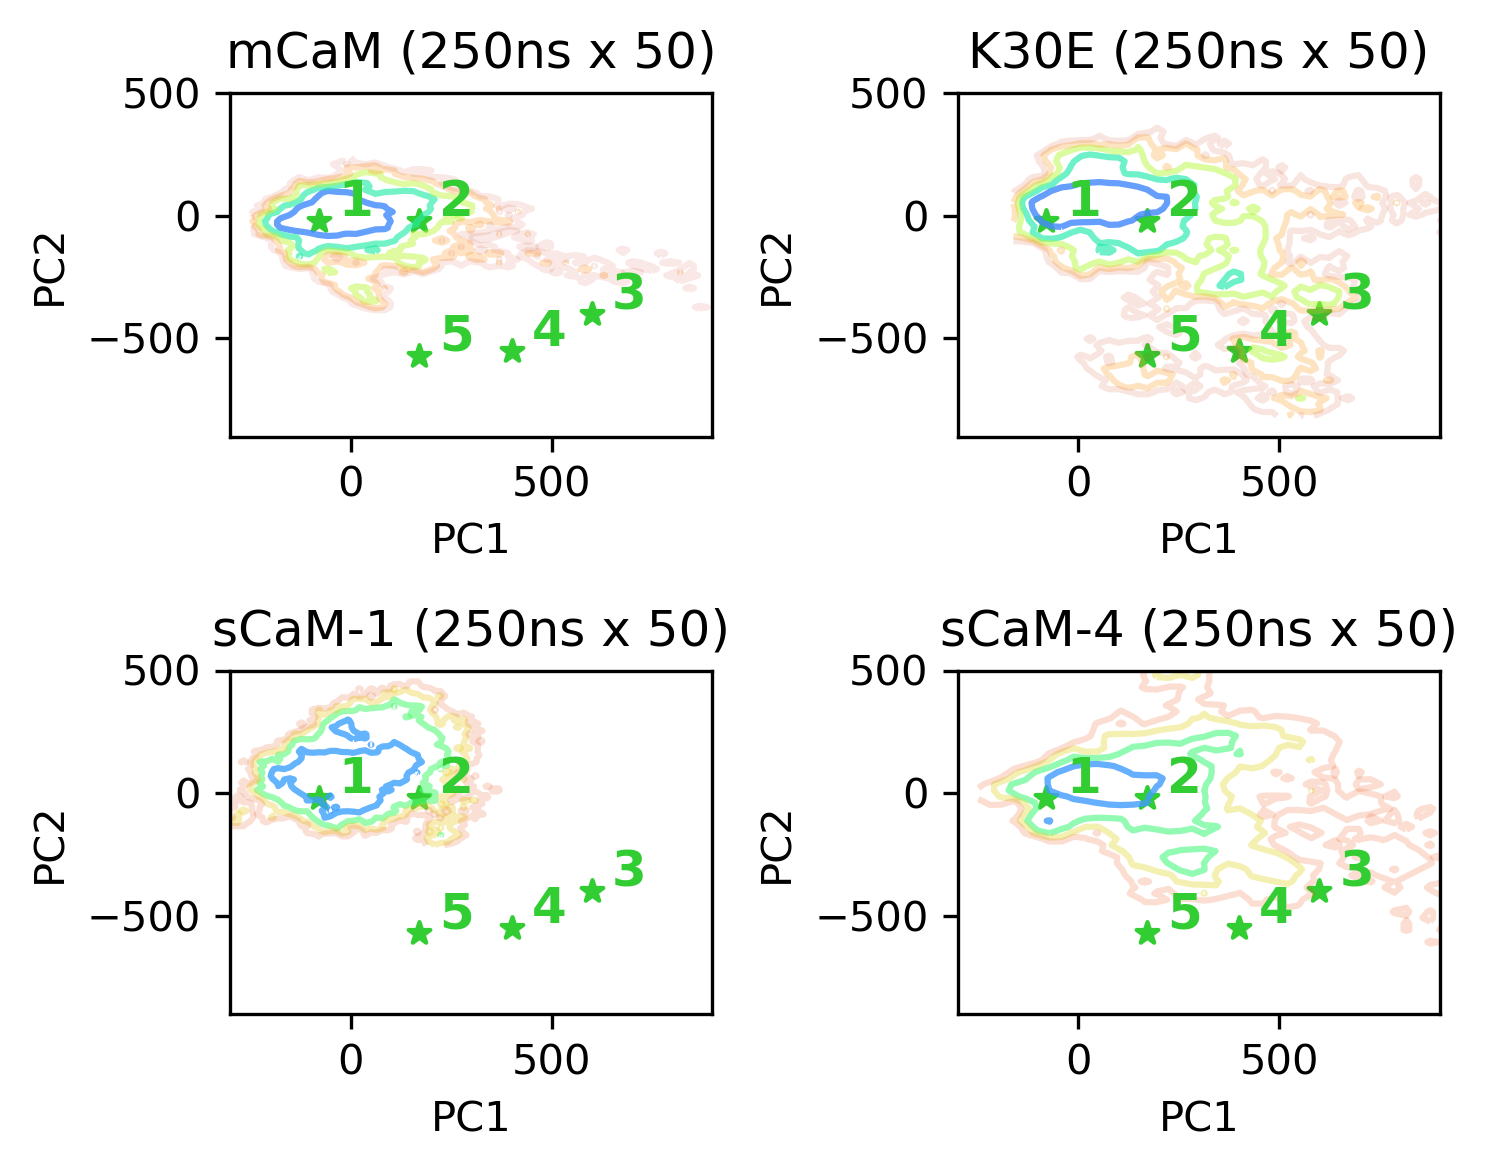

In [33]:
# complex - short
rcParams['figure.figsize']=10,4
rcParams['font.size']=10
rcParams['figure.dpi']=300
idx1=1
idx2=2
comp=2
centers=[[-80,-20],[170,-20],[600,-400],[400,-550],[170,-570]]
centerCols=['tab:red','gold','tab:orange','mediumpurple','limegreen']

fig=plt.figure()
for i,sys in enumerate(systems):
    ax=fig.add_subplot(2,4,i+1)
    ax.set_xlim([-300, 900])
    ax.set_ylim([-900, 500])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(labels[i])

    data=np.genfromtxt(path+'/analyses/shortMD/pca/wtAsRef/all/{}_{}_hists_{}-{}.gnu'.format(sys,comp,idx1,idx2),skip_header=7,skip_footer=3)
    X,Y,drawdata=data[:,0],data[:,1],data[:,2]
    z=drawdata.copy()
    z=np.append(z,z[-1])
    z=z.reshape((50,50),order='F')
    y=Y[:50]
    x=[]
    for j,val in enumerate(X):
        if j%50==0:
            x.append(val)
    ax.contour(x,y,z,cmap=map_object,vmax=np.max(drawdata),levels=5)
    for j,c in enumerate(centers):
        ax.scatter(c[0],c[1],s=30,color='limegreen',marker='*')
        ax.text(c[0]+50, c[1]+20, j+1,fontsize=7,color='limegreen',fontweight='bold')
    
plt.tight_layout()
plt.gcf().savefig('pca_all_short.png')


rcParams['figure.figsize']=5,4
rcParams['font.size']=10
rcParams['figure.dpi']=300
idx1=1
idx2=2
comp=2
centers=[[-80,-20],[170,-20],[600,-400],[400,-550],[170,-570]]
centerCols=['tab:red','gold','tab:orange','mediumpurple','limegreen']

fig=plt.figure()
for i,sys in enumerate(['mcam','cam_k30e','scam1','scam4']):
    ax=fig.add_subplot(2,2,i+1)
    ax.set_xlim([-300, 900])
    ax.set_ylim([-900, 500])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(['mCaM','K30E','sCaM-1','sCaM-4'][i] + ' (250ns x 50)')

    data=np.genfromtxt(path+'/analyses/shortMD/pca/wtAsRef/all/{}_{}_hists_{}-{}.gnu'.format(sys,comp,idx1,idx2),skip_header=7,skip_footer=3)
    X,Y,drawdata=data[:,0],data[:,1],data[:,2]
    z=drawdata.copy()
    z=np.append(z,z[-1])
    z=z.reshape((50,50),order='F')
    y=Y[:50]
    x=[]
    for j,val in enumerate(X):
        if j%50==0:
            x.append(val)
    ax.contour(x,y,z,cmap=map_object,vmax=np.max(drawdata),levels=5)
    for j,c in enumerate(centers):
        ax.scatter(c[0],c[1],s=30,color='limegreen',marker='*')
        ax.text(c[0]+50, c[1]+20, j+1,fontsize=12,color='limegreen',fontweight='bold')
    
plt.tight_layout()
plt.gcf().savefig('pca_all_short_reduced.png')

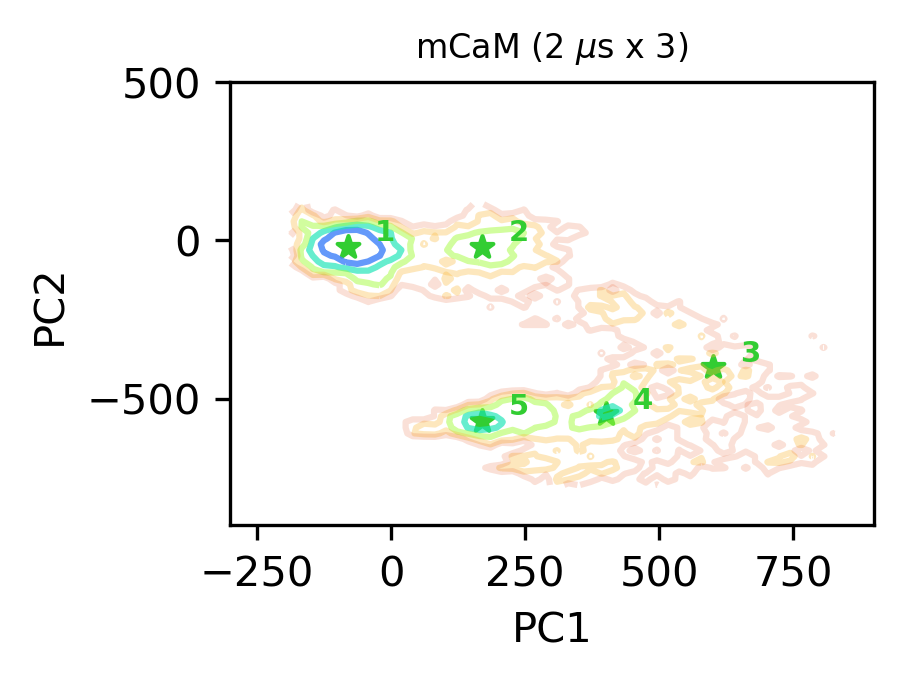

In [18]:
# complex - long
rcParams['figure.figsize']=10,4
rcParams['font.size']=10
rcParams['figure.dpi']=300
idx1=1
idx2=2
comp=2
centers=[[-80,-20],[170,-20],[600,-400],[400,-550],[170,-570]]
centerCols=['tab:red','gold','tab:orange','mediumpurple','limegreen']

fig=plt.figure()
ax=fig.add_subplot(2,4,1)  
ax.set_xlim([-300, 900])
ax.set_ylim([-900, 500])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('mCaM (2 $\mu$s x 3)',fontsize=8)

data=np.genfromtxt(path+'/analyses/cMD/allTraj/pca/shortAsRef/all/mcam_2_hists_{}-{}.gnu'.format(idx1,idx2),skip_header=7,skip_footer=3)
X,Y,drawdata=data[:,0],data[:,1],data[:,2]
z=drawdata.copy()
z=np.append(z,z[-1])
z=z.reshape((50,50),order='F')
y=Y[:50]
x=[]
r=30
for j,val in enumerate(X):
    if j%50==0:
        x.append(val)
ax.contour(x,y,z,cmap=map_object,vmax=np.max(drawdata),levels=5)
for j,c in enumerate(centers):
    ax.scatter(c[0],c[1],s=30,color='limegreen',marker='*')
    ax.text(c[0]+50, c[1]+20, j+1,fontsize=7,color='limegreen',fontweight='bold')
    
    
plt.tight_layout()
plt.gcf().savefig('pca_all_long.png')

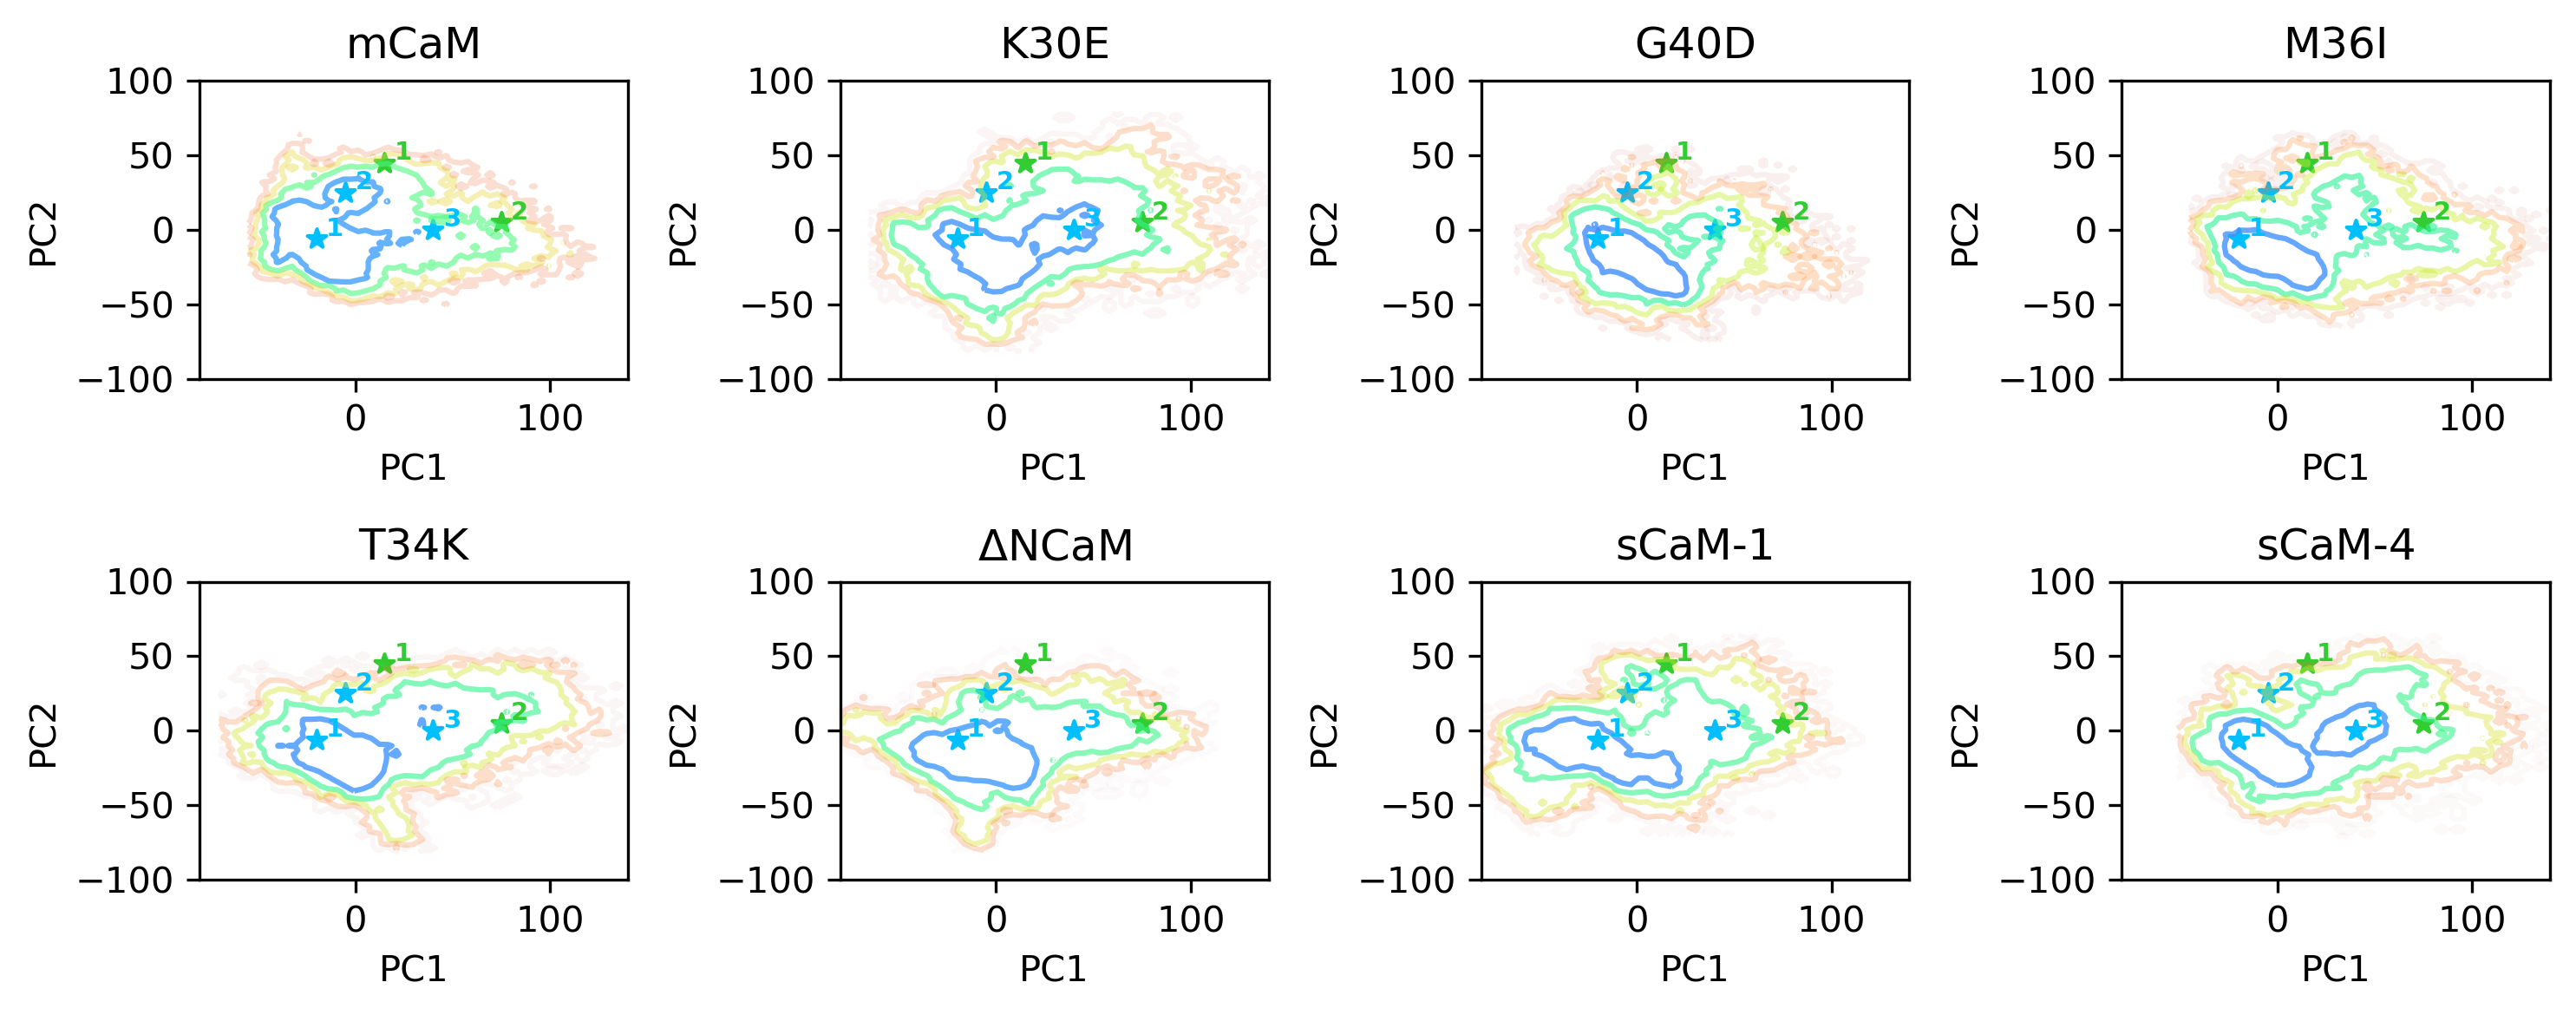

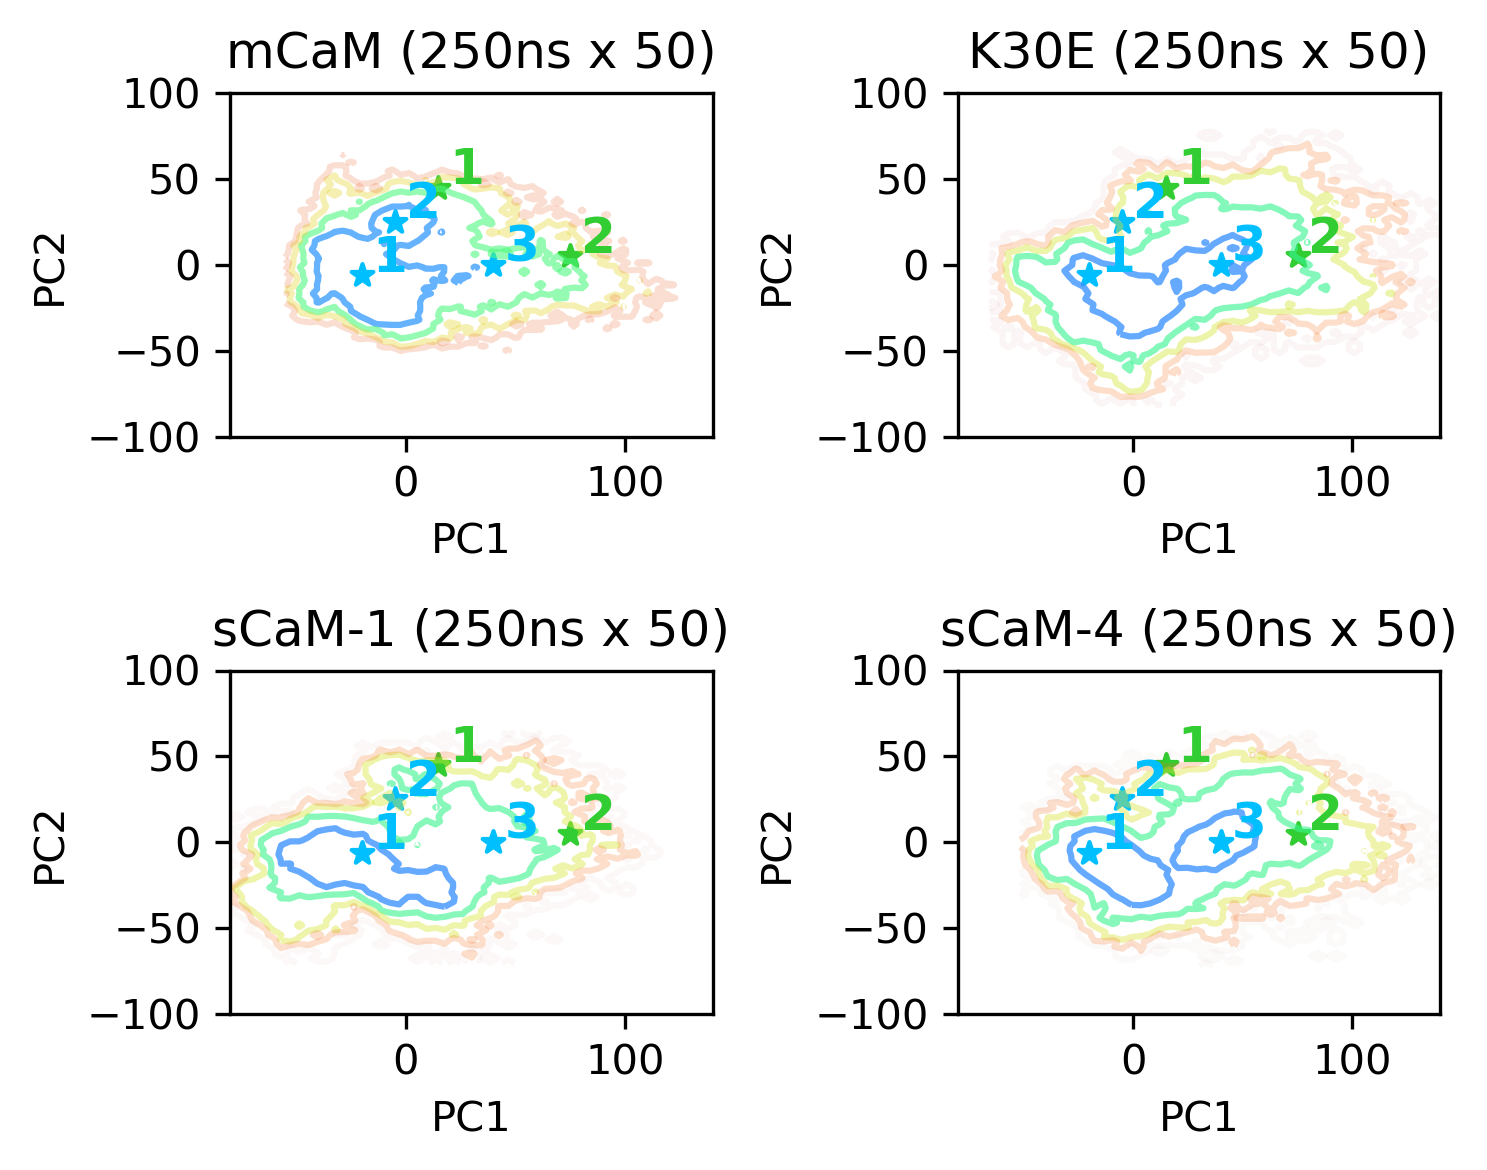

In [35]:
# mlck - short
rcParams['figure.figsize']=10,4
rcParams['font.size']=10
rcParams['figure.dpi']=300
idx1=1
idx2=2
comp=2
centersComp=[[15,45],[75,5]]
centers=[[-20,-6],[-5,25],[40,0]]
centerCols=['tab:red','gold','tab:orange','mediumpurple','limegreen','lightcoral','deepskyblue']

fig=plt.figure()
for i,sys in enumerate(systems):
    ax=fig.add_subplot(2,4,i+1)
    ax.set_xlim([-80, 140])
    ax.set_ylim([-100, 100])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(labels[i])
    data=np.genfromtxt(path+'/analyses/shortMD/pca/wtAsRef/mlck/{}_{}_hists_{}-{}.gnu'.format(sys,comp,idx1,idx2),skip_header=7,skip_footer=3)
    X,Y,drawdata=data[:,0],data[:,1],data[:,2]
    z=drawdata.copy()
    z=np.append(z,z[-1])
    z=z.reshape((50,50),order='F')
    y=Y[:50]
    x=[]
    for i,val in enumerate(X):
        if i%50==0:
            x.append(val)
    ax.contour(x,y,z,cmap=map_object,vmax=np.max(drawdata),levels=5)   
    for j,c in enumerate(centers):
        ax.scatter(c[0],c[1],s=30,color='deepskyblue',marker='*')
        ax.text(c[0]+5, c[1]+2, j+1,fontsize=7,color='deepskyblue',fontweight='bold')
    for j,c in enumerate(centersComp):
        ax.scatter(c[0],c[1],s=30,color='limegreen',marker='*')
        ax.text(c[0]+5, c[1]+2, j+1,fontsize=7,color='limegreen',fontweight='bold')

plt.tight_layout()
plt.gcf().savefig('pca_mlck_short.png')


rcParams['figure.figsize']=5,4
rcParams['font.size']=10
rcParams['figure.dpi']=300
idx1=1
idx2=2
comp=2
centerCols=['tab:red','gold','tab:orange','mediumpurple','limegreen','lightcoral','deepskyblue']

fig=plt.figure()
for i,sys in enumerate(['mcam','cam_k30e','scam1','scam4']):
    ax=fig.add_subplot(2,2,i+1)
    ax.set_xlim([-80, 140])
    ax.set_ylim([-100, 100])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(['mCaM','K30E','sCaM-1','sCaM-4'][i] + ' (250ns x 50)')
    data=np.genfromtxt(path+'/analyses/shortMD/pca/wtAsRef/mlck/{}_{}_hists_{}-{}.gnu'.format(sys,comp,idx1,idx2),skip_header=7,skip_footer=3)
    X,Y,drawdata=data[:,0],data[:,1],data[:,2]
    z=drawdata.copy()
    z=np.append(z,z[-1])
    z=z.reshape((50,50),order='F')
    y=Y[:50]
    x=[]
    for i,val in enumerate(X):
        if i%50==0:
            x.append(val)
    ax.contour(x,y,z,cmap=map_object,vmax=np.max(drawdata),levels=5)   
    for j,c in enumerate(centers):
        ax.scatter(c[0],c[1],s=30,color='deepskyblue',marker='*')
        ax.text(c[0]+5, c[1]+2, j+1,fontsize=12,color='deepskyblue',fontweight='bold')
    for j,c in enumerate(centersComp):
        ax.scatter(c[0],c[1],s=30,color='limegreen',marker='*')
        ax.text(c[0]+5, c[1]+2, j+1,fontsize=12,color='limegreen',fontweight='bold')

plt.tight_layout()
plt.gcf().savefig('pca_mlck_short_reduced.png')



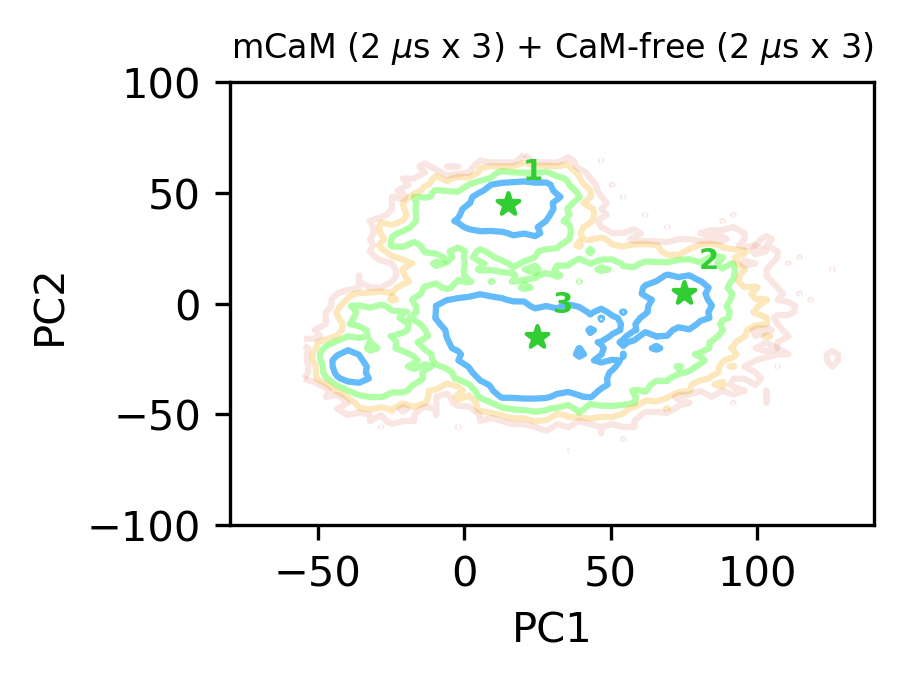

In [36]:
# mlck - long
rcParams['figure.figsize']=10,4
rcParams['font.size']=10
rcParams['figure.dpi']=300
idx1=1
idx2=2
comp=2
centersComp=[[15,45],[75,5],[25,-15]] #,[-40,-30]]
centerCols=['tab:red','gold','tab:orange','mediumpurple','limegreen','lightcoral','deepskyblue','navy']

fig=plt.figure()
ax=fig.add_subplot(2,4,1)
ax.set_xlim([-80, 140])
ax.set_ylim([-100, 100])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('mCaM (2 $\mu$s x 3) + CaM-free (2 $\mu$s x 3)',fontsize=8)
data=np.genfromtxt(path+'/analyses/shortMD/pca/wtAsRef/mlck/long_hists_{}-{}.gnu'.format(idx1,idx2),skip_header=7,skip_footer=3)
X,Y,drawdata=data[:,0],data[:,1],data[:,2]
z=drawdata.copy()
z=np.append(z,z[-1])
z=z.reshape((50,50),order='F')
y=Y[:50]
x=[]
for i,val in enumerate(X):
    if i%50==0:
        x.append(val)
ax.contour(x,y,z,cmap=map_object,vmax=np.max(drawdata),levels=5)
for j,c in enumerate(centersComp):
    ax.scatter(c[0],c[1],s=30,color='limegreen',marker='*')
    ax.text(c[0]+5, c[1]+11, j+1,fontsize=7,color='limegreen',fontweight='bold')

plt.tight_layout()
plt.gcf().savefig('pca_mlck_long.png')



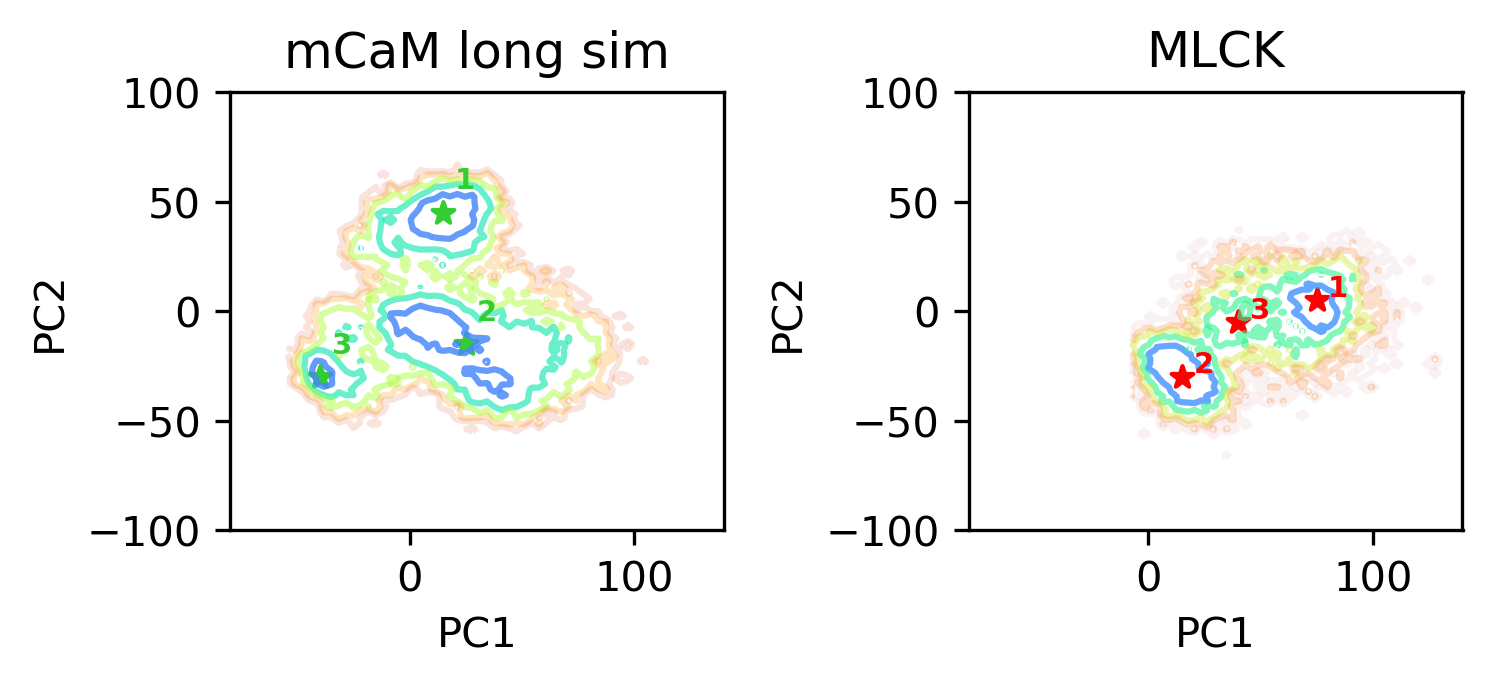

In [12]:
# mlck - long - separated
rcParams['figure.figsize']=10,4
rcParams['font.size']=10
rcParams['figure.dpi']=300
idx1=1
idx2=2
comp=2
centersComp=[[15,45],[25,-15],[-40,-30]]
centersMLCK=[[75,5],[15,-30],[40,-5]]
centerCols=['tab:red','gold','tab:orange','mediumpurple','limegreen','lightcoral','deepskyblue','navy']

fig=plt.figure()
ax=fig.add_subplot(2,4,1)
ax.set_xlim([-80, 140])
ax.set_ylim([-100, 100])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(labels[8])
data=np.genfromtxt(path+'/analyses/cMD/allTraj/pca/shortAsRef/mlck/mcam_2_hists_{}-{}.gnu'.format(idx1,idx2),skip_header=7,skip_footer=3)
X,Y,drawdata=data[:,0],data[:,1],data[:,2]
z=drawdata.copy()
z=np.append(z,z[-1])
z=z.reshape((50,50),order='F')
y=Y[:50]
x=[]
for i,val in enumerate(X):
    if i%50==0:
        x.append(val)
ax.contour(x,y,z,cmap=map_object,vmax=np.max(drawdata),levels=5)
for j,c in enumerate(centersComp):
    ax.scatter(c[0],c[1],s=30,color='limegreen',marker='*')
    ax.text(c[0]+5, c[1]+11, j+1,fontsize=7,color='limegreen',fontweight='bold')
    
ax=fig.add_subplot(2,4,2)
ax.set_xlim([-80, 140])
ax.set_ylim([-100, 100])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(labels[9])
data=np.genfromtxt('/home/xfang2/backup/faust_backup/mlck/smMLCK/md/1_mlck_kinaseDomain+AID+CaMBR/analyses/pca/shortAsRef/hists_{}-{}.gnu'.format(idx1,idx2),skip_header=7,skip_footer=3)
X,Y,drawdata=data[:,0],data[:,1],data[:,2]
z=drawdata.copy()
z=np.append(z,z[-1])
z=z.reshape((50,50),order='F')
y=Y[:50]
x=[]
for i,val in enumerate(X):
    if i%50==0:
        x.append(val)
ax.contour(x,y,z,cmap=map_object,vmax=np.max(drawdata),levels=5)
for j,c in enumerate(centersMLCK):
    ax.scatter(c[0],c[1],s=30,color='red',marker='*')
    ax.text(c[0]+5, c[1]+2, j+1,fontsize=7,color='red',fontweight='bold')

plt.tight_layout()

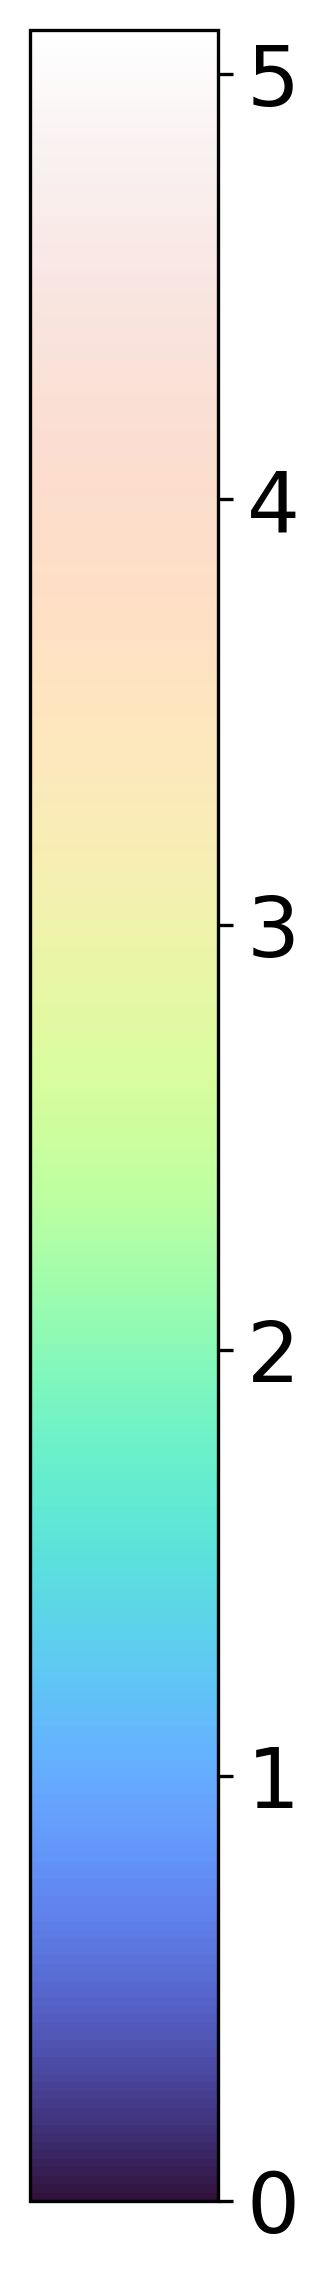

In [56]:
# get color bar
rcParams['figure.figsize']=1.5, 8
rcParams['font.size']=20
rcParams['figure.dpi']=300
fig=plt.figure()
ax=fig.add_subplot(111)

norm=matplotlib.colors.Normalize(vmin=np.min(drawdata), vmax=np.max(drawdata))
matplotlib.colorbar.ColorbarBase(ax, cmap=map_object,norm=norm)

plt.tight_layout()
plt.savefig('pca_colorbar.png')